In [59]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

def lista_multi_shapefiles(path):
    """ 
    Função para carregar arquivos de shapefile e retornar uma lista de shapefiles
    
    """
    lista_shp = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".shp"):
                lista_shp.append(os.path.join(root, file))
    return lista_shp



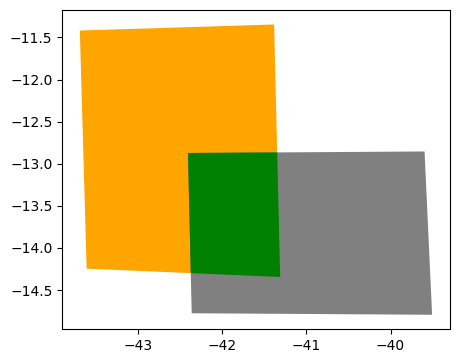

In [60]:
### Intersect datasets ###
#https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersection.html
path = '/home/luismellow/Documents/08_bd_teste/04_teste_poligonos/'

for i in lista_multi_shapefiles(path):
    if i.endswith('_1.shp'):
        df1 = gpd.read_file(i)
        
    if i.endswith('_02.shp'):
        df2 = gpd.read_file(i)

intersection = df1['geometry'].intersection(df2['geometry'])

#plotando os dois shapefiles para visualizar a sobreposição
fig, ax = plt.subplots(figsize=(5,5))
df1.plot(ax=ax, color='orange') # df1 é o shapefile laranja
df2.plot(ax=ax, color='grey') # df2 é o shapefile cinza
intersection.plot(ax=ax, color='green') #intersection é o shapefile verde
plt.show()


<AxesSubplot:>

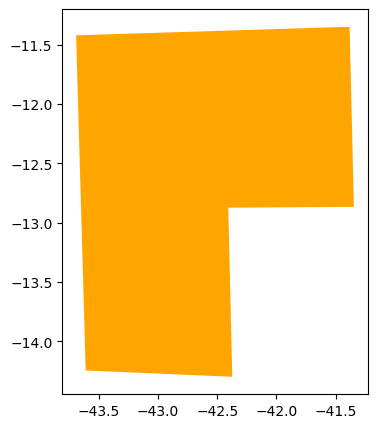

In [61]:
### Fazendo a diferença entre dois shapefiles ###
difference = df1['geometry'].difference(df2['geometry'])
fig, ax = plt.subplots(figsize=(5,5))
difference.plot(ax=ax, color='orange')

<AxesSubplot:>

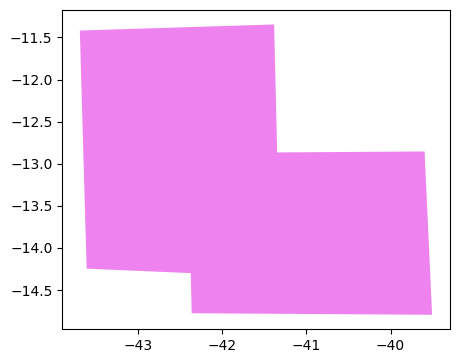

In [62]:
### Union datasets ###
union =  df1['geometry'].union(df2['geometry'])
###plottando os dois shapefiles para visualizar a sobreposição
fig, ax = plt.subplots(figsize=(5,5))
union.plot(ax=ax, color='violet')

<AxesSubplot:>

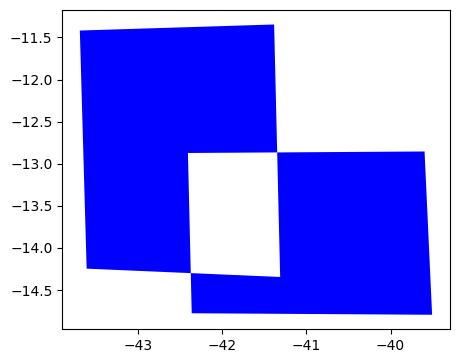

In [63]:
### Symmetric difference ###
symmetric_difference = df1['geometry'].symmetric_difference(df2['geometry'])
fig, ax = plt.subplots(figsize=(5,5))
symmetric_difference.plot(ax=ax, color='blue')

id_left  campo_01                                           geometry  \
0        1  teste_01  POLYGON ((-43.69048 -11.41827, -43.69048 -11.4...   

   index_right  id_right  Campo_02  
0            0         1  teste_02

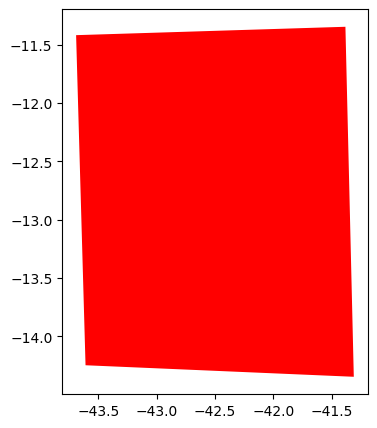

In [68]:
### spatial join ###
#https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
sjoin = gpd.sjoin(df1, df2, how='inner', op='intersects')
fig, ax = plt.subplots(figsize=(5,5))
sjoin.plot(ax=ax, color='red')
sjoin.head()